# Gold Price Forecasting using Time Series Analysis

## Project Overview

In this project, we have utilized publicly available data to forecast gold prices using time series analysis. The main steps involved in this project are data processing, visualization, cleaning, and applying various time series models to achieve accurate forecasts.

## Steps Involved

### 1. Data Collection
- **Source:** Publicly available dataset
- **Description:** The dataset contains historical gold prices over a specified period.

### 2. Data Processing
- **Cleaning:** Handling missing values, outliers, and noise in the data.
- **Transformation:** Converting the data into a suitable format for time series analysis.
- **Visualization:** Plotting the data to understand trends, seasonality, and any underlying patterns.

### 3. Time Series Analysis
- **Understanding the Data:** Analyzing the trends, seasonality, and residuals to gain insights into the data.
- **Model Fitting:** Using residual analysis to fit the data and identify the most appropriate time series model.
- **Model Selection:** Comparing different time series models to find the one with the lowest Akaike Information Criterion (AIC) without compromising on proficiency.

### 4. Forecasting
- **Model Training:** Training the selected model on the historical data.
- **Prediction:** Forecasting future gold prices using the trained model.
- **Validation:** Evaluating the forecast to ensure it aligns with expected trends and patterns.

## Results
The final model was able to forecast gold prices with reasonable accuracy, demonstrating its effectiveness in capturing the underlying patterns and trends in the data.

## Conclusion
This project illustrates the application of time series analysis in forecasting financial data. The use of various models and selection criteria ensures that the chosen model provides a balance between accuracy and complexity, making it a valuable tool for predicting future prices.

In [ ]:
# Installing Packages 
!pip install seaborn 
!pip install statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')Installing Packages 
!pip install seaborn 
!pip install statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("gold_monthly_csv.csv")
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [13]:
df.shape


(847, 2)

In [14]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [16]:
date = pd.date_range (start ='1/1/1950' , end = '8/1/2020' , freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [17]:
df['month'] = date
df.drop('Date' , axis = 1, inplace = True)
df = df.set_index('month')

df.head()


,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


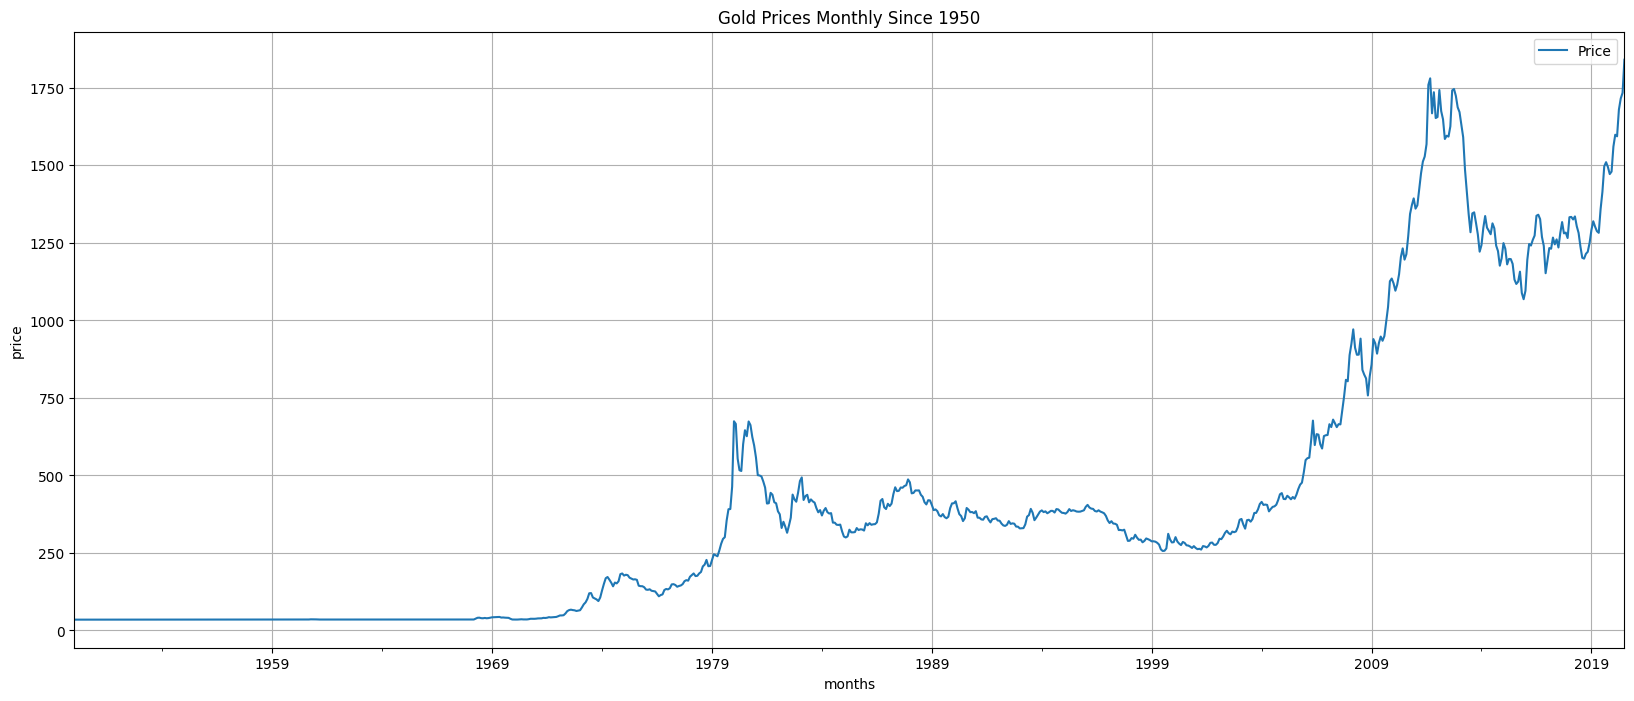

In [18]:
df.plot(figsize = (20,8))
plt.title("Gold Prices Monthly Since 1950")
plt.xlabel("months")
plt.ylabel("price")
plt.grid();

In [19]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')



ADF Statistic: 0.8143240077835305
p-value: 0.9918639010465632
Critical Value (1%): -3.4382057088878644
Critical Value (5%): -2.865007578546518
Critical Value (10%): -2.5686164240381513


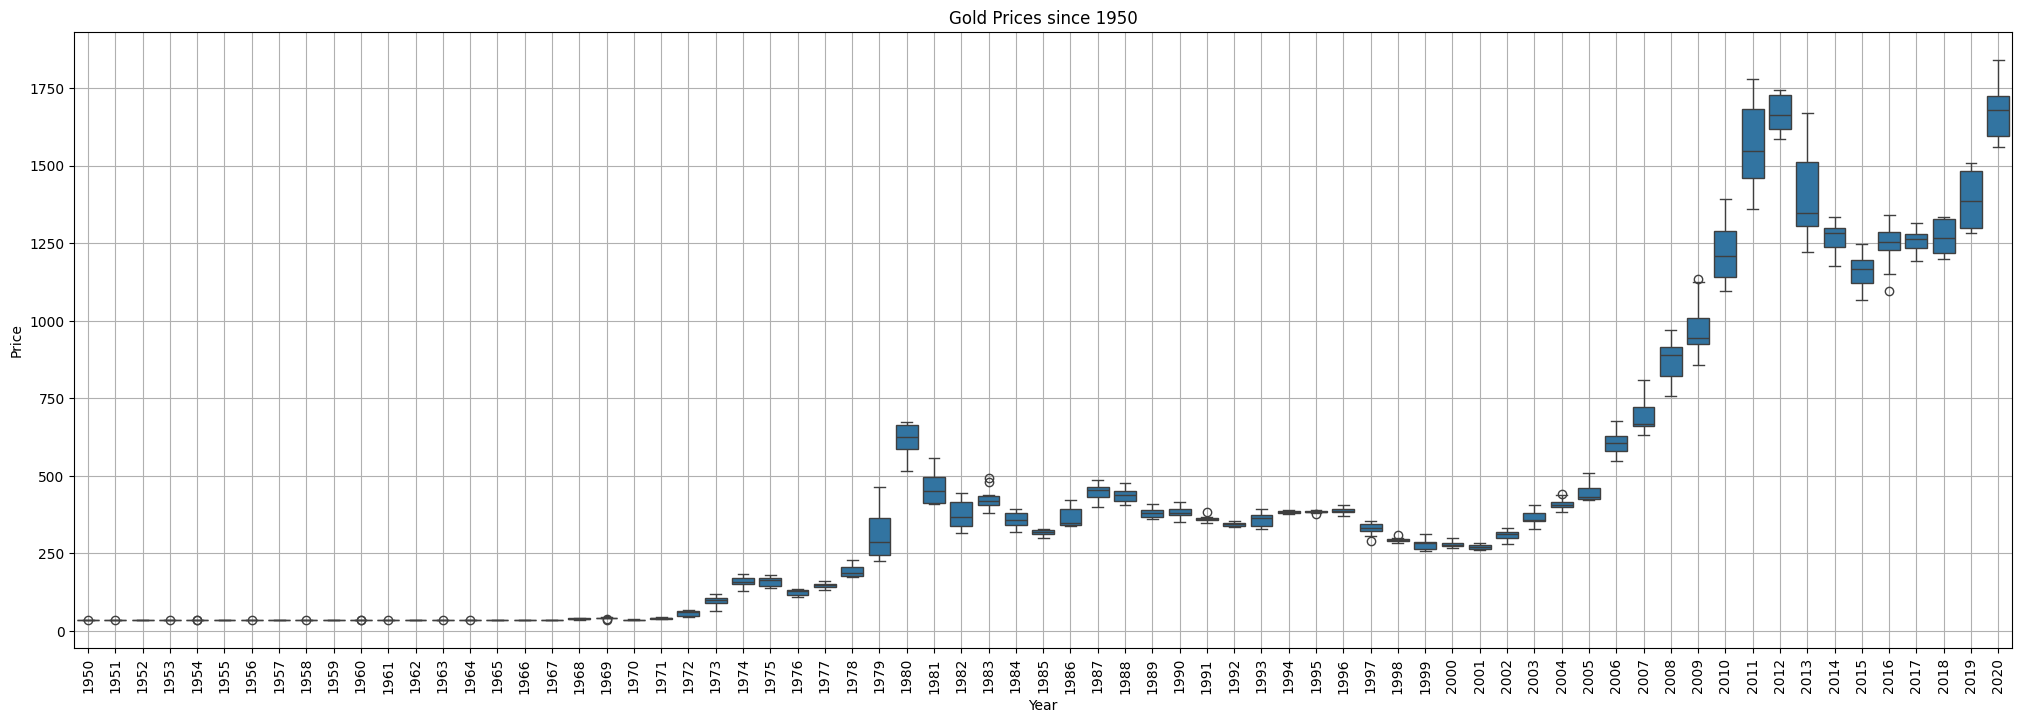

In [9]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x=df.index.year, y=df.values[:, 0], ax=ax)
plt.title("Gold Prices since 1950")
plt.xlabel("Year")  # Fixed typo: "plt" instead of "olt"
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid()


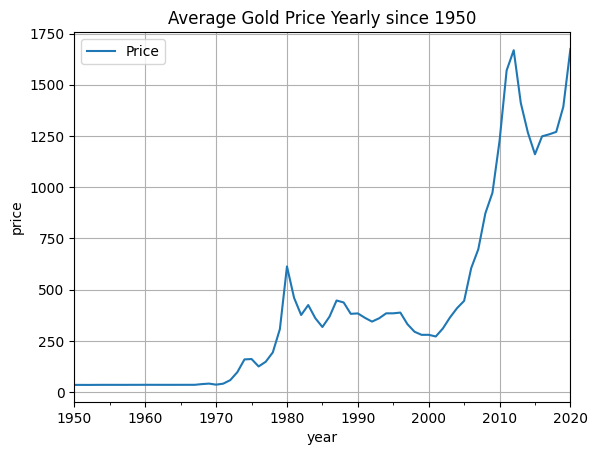

In [21]:
df_yearly_sum = df.resample("A").mean()
df_yearly_sum.plot();
plt.title("Average Gold Price Yearly since 1950")
plt.xlabel("year")
plt.ylabel('price')
plt.grid();

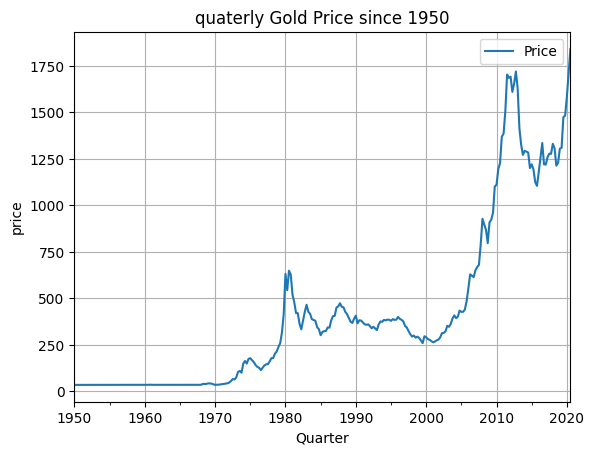

In [12]:
df_quaterly_sum = df.resample("Q").mean()
df_quaterly_sum.plot();
plt.title("quaterly Gold Price since 1950")
plt.xlabel("Quarter")
plt.ylabel('price')
plt.grid();

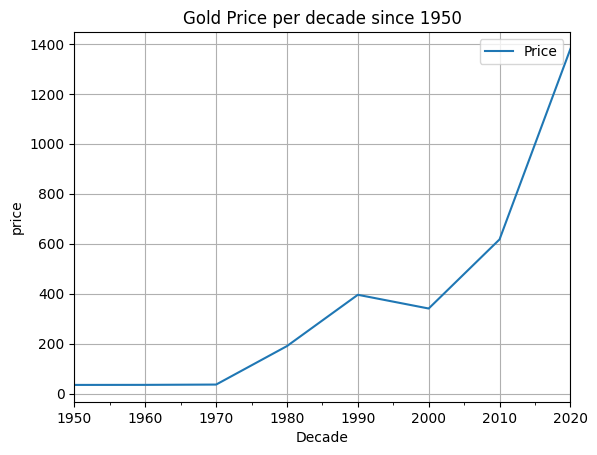

In [13]:
df_decade_sum = df.resample("10Y").mean()
df_decade_sum.plot();
plt.title("Gold Price per decade since 1950")
plt.xlabel("Decade")
plt.ylabel('price')
plt.grid();

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')


ADF Statistic: 0.8143240077835305
p-value: 0.9918639010465632
Critical Value (1%): -3.4382057088878644
Critical Value (5%): -2.865007578546518
Critical Value (10%): -2.5686164240381513


In [23]:
from statsmodels.tsa.stattools import kpss

result = kpss(df['Price'], regression='c', nlags="auto")
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[3].items():
    print(f'Critical Value ({key}): {value}')


KPSS Statistic: 3.272836378119359
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


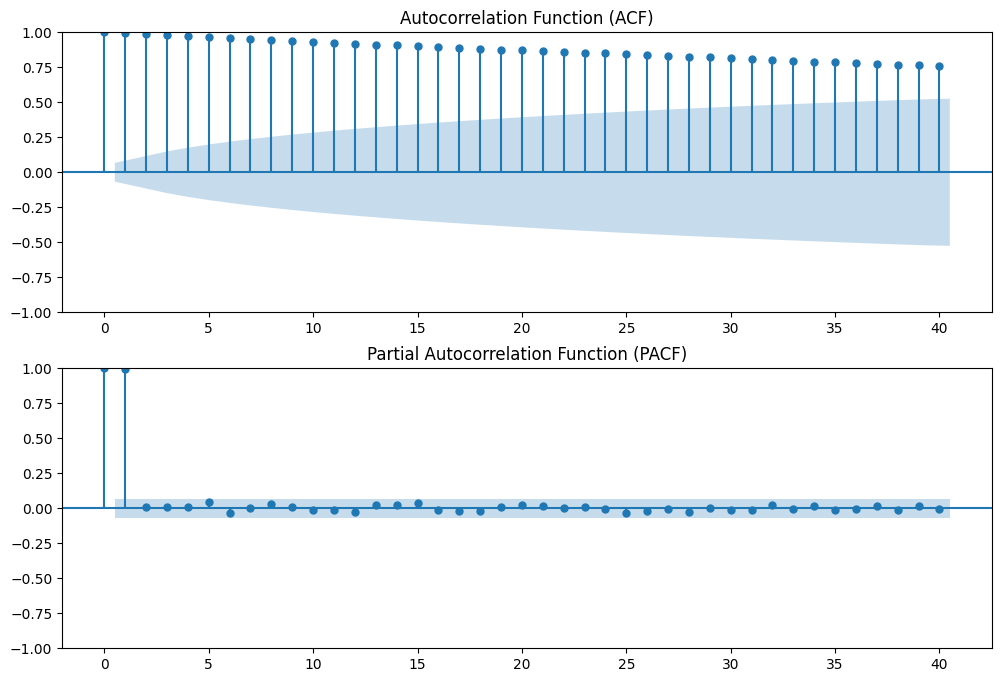

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df['Price'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df['Price'], lags=40, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()


In [16]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'price': 'std'}), left_index=True, right_index=True)

# Check the columns of df_1
print(df_1.columns)

# Now calculate 'Cov_pct' only if 'std' column is present
if 'std' in df_1.columns:
    df_1['Cov_pct'] = ((df_1['std'] / df_1["Mean"]) * 100).round(2)

df_1.head()


Index(['Price_x', 'Price_y'], dtype='object')


,Price_x,Price_y
month,,
1950,34.729167,0.002887
1951,34.717500,0.020057
1952,34.628333,0.117538
1953,34.879167,0.056481
1954,35.020000,0.082792


In [17]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [18]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


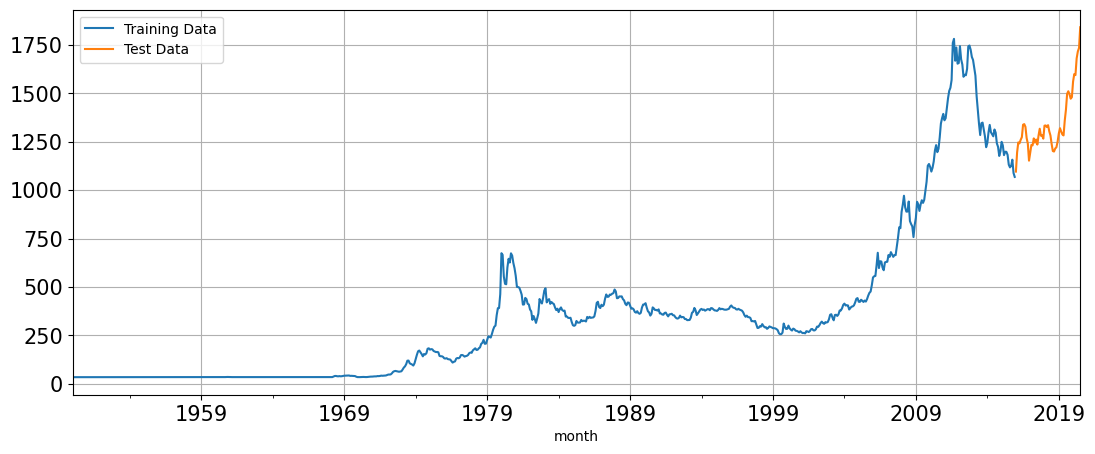

In [19]:
train["Price"].plot(figsize = (13,5), fontsize = 15)
test["Price"].plot(figsize = (13,5), fontsize = 15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [20]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range (len(test))]
len(train_time), len(test_time)

(792, 55)

In [21]:
LR_train = train.copy()
LR_test = test.copy()

In [22]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [23]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

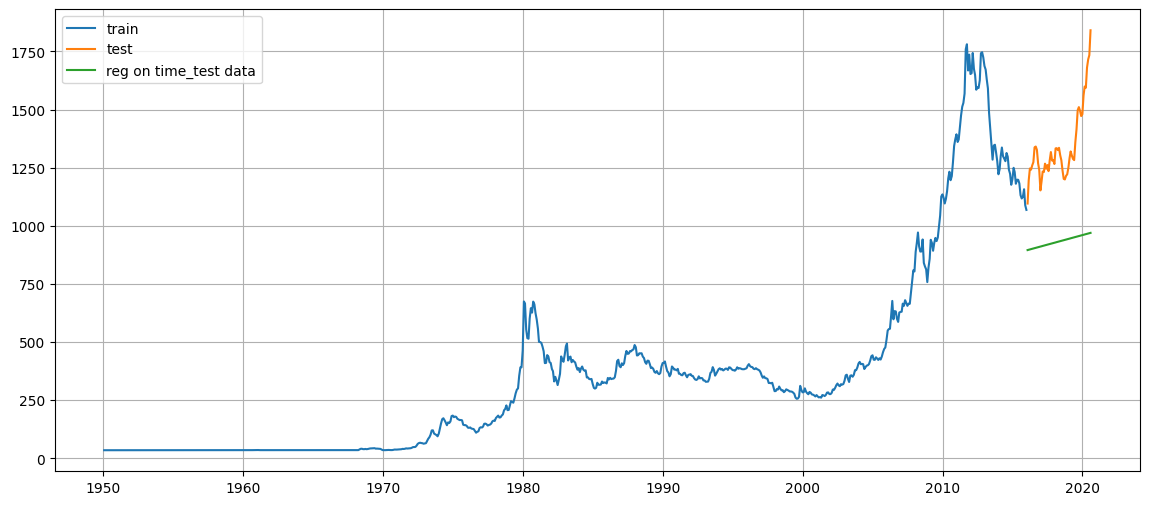

In [24]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'],label ='reg on time_test data')
plt.legend(loc ='best')
plt.grid()

In [25]:
def mape(actual, pred):
    return round((np.mean(abs(actual-pred)/ actual))*100, 2)

In [26]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print("Mape is %3.3f"%(mape_model1_test), "%")

Mape is 29.760 %


In [27]:
results = pd.DataFrame({'Test Mape(%)': [mape_model1_test]}, index=['RegressionOnTime'])
results

,Test Mape(%)
RegressionOnTime,29.76


In [28]:
final_model = ExponentialSmoothing(df,
                                   trend = 'additive').fit(smoothing_level = 0.4,
                                                           smoothing_trend = 0.3,
                                                           smoothing_seasonal = 0.6)

In [29]:
MAPE_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('MAPE:', MAPE_final_model)

MAPE: 3.26


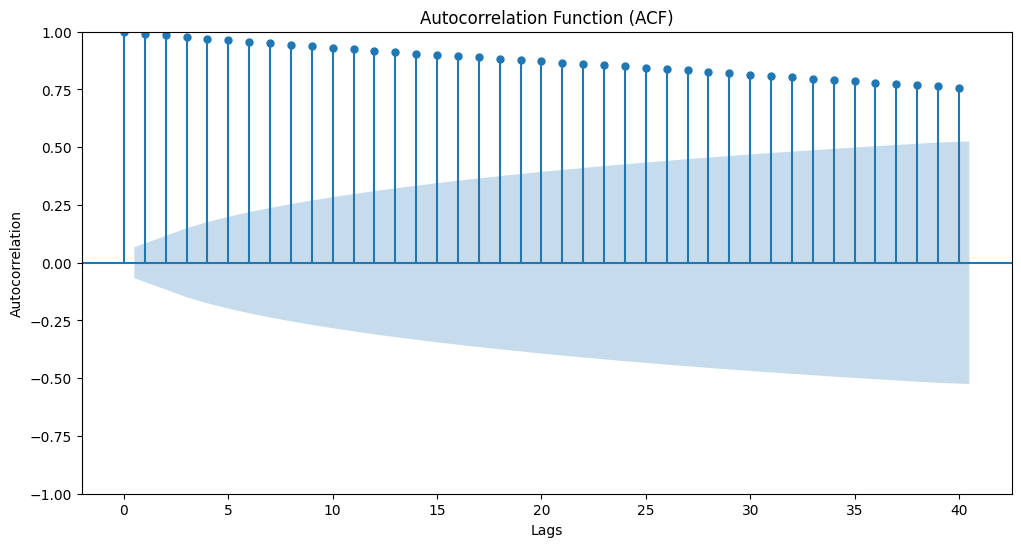

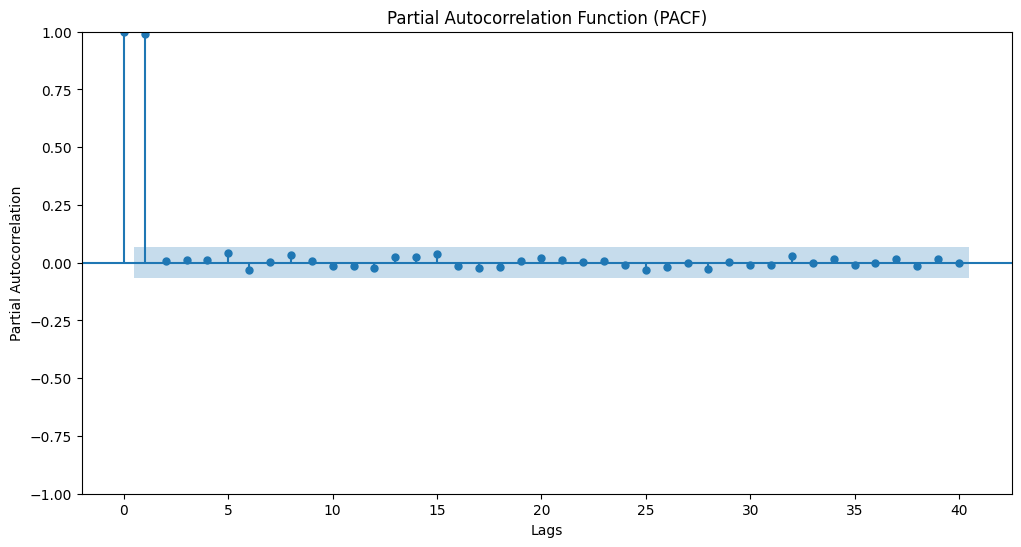

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming your data is stored in a DataFrame called 'df' with a column named 'price'

# Plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df['Price'], lags=40, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df['Price'], lags=40, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


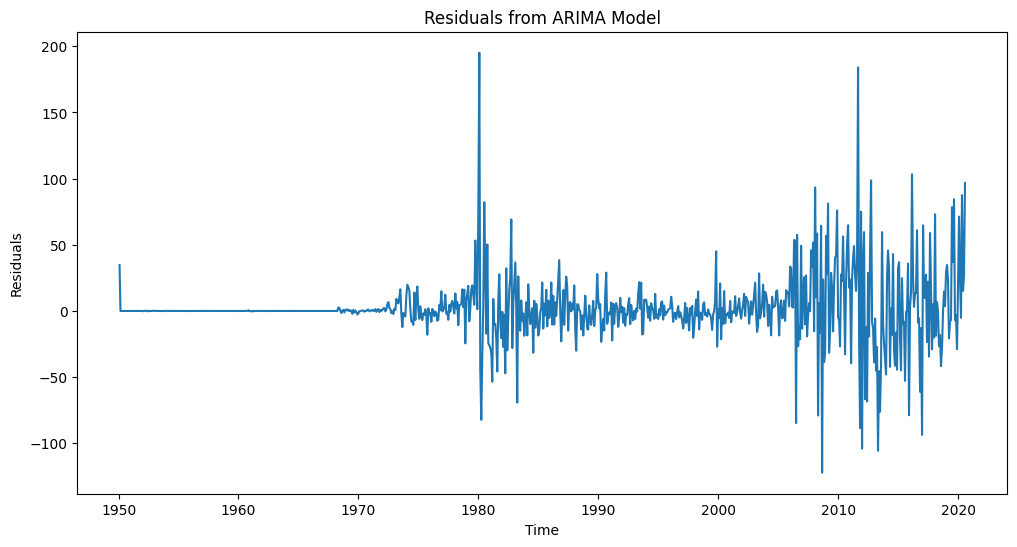

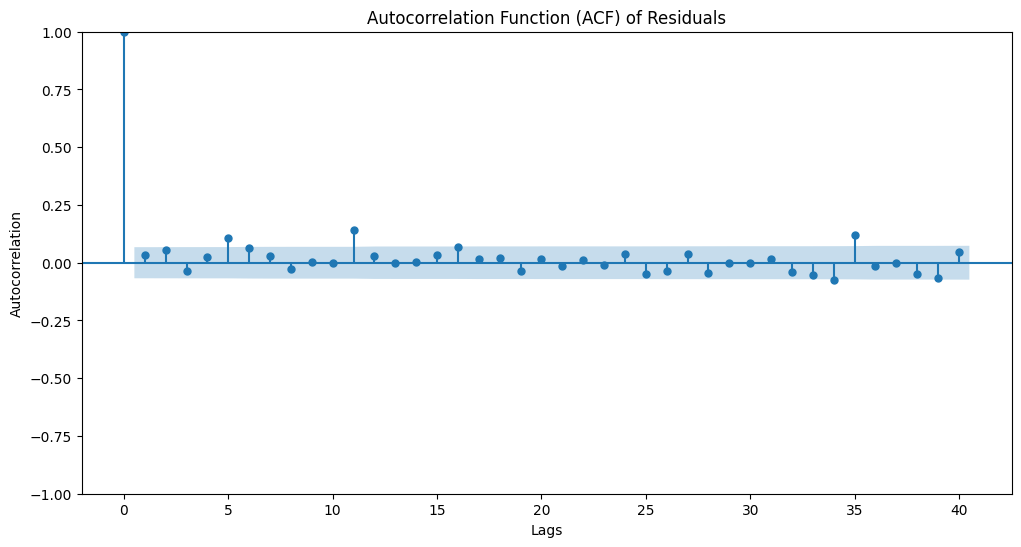

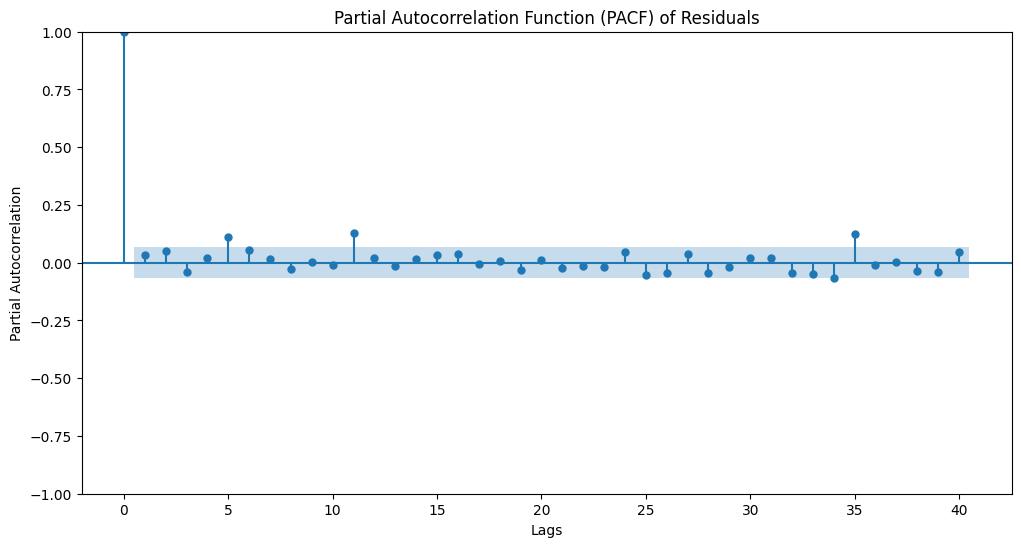

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Assuming your data is stored in a DataFrame called 'df' with a column named 'Price'

# Fit ARIMA model (p, d, q) - you can adjust the order as needed
model = ARIMA(df['Price'], order=(1, 1, 1))  # Example order (1, 1, 1)
model_fit = model.fit()

# Extract residuals
residuals = model_fit.resid

# Plot residuals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals from ARIMA Model')
plt.show()

# Plot ACF of residuals
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

# Plot PACF of residuals
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(residuals, lags=40, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.show()


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 640.0 kB/s eta 0:00:01
   ----------- ---------------------------- 184.3/614.7 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------ --------------------------------- 0.5/2.8 MB 10.0 MB/s eta 0:00:01
   ------------- ---

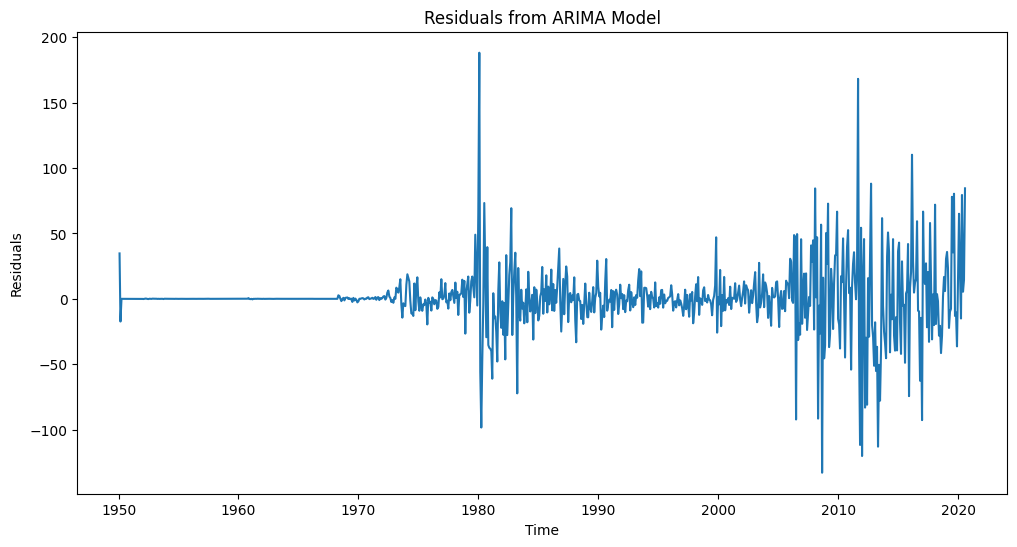

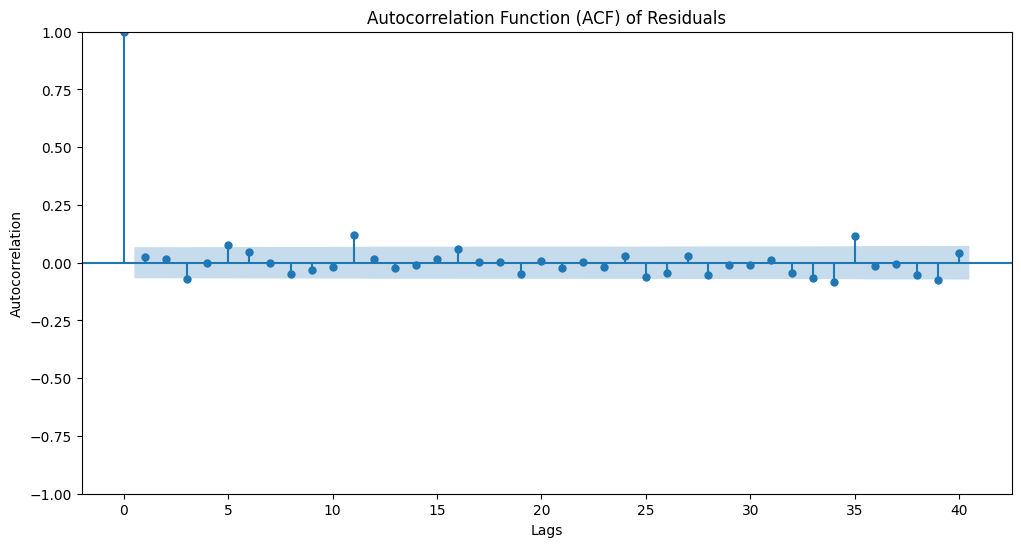

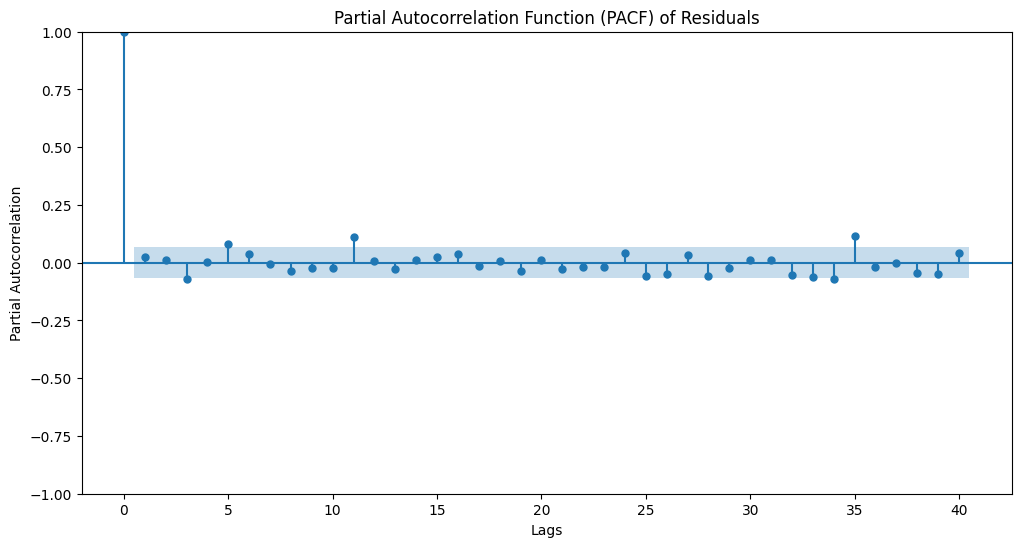

In [33]:
!pip install pmdarima
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Assuming your data is stored in a DataFrame called 'df' with a column named 'Price'

# Step 1: Determine the best order for the ARIMA model
auto_model = auto_arima(df['Price'], seasonal=False, trace=True, 
                        error_action='ignore', suppress_warnings=True, stepwise=True)

# Best ARIMA order
order = auto_model.order
print(f"Optimal order for ARIMA model: {order}")

# Step 2: Fit the ARIMA model with the determined order
model = ARIMA(df['Price'], order=order)
model_fit = model.fit()

# Step 3: Extract residuals
residuals = model_fit.resid

# Step 4: Plot residuals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals from ARIMA Model')
plt.show()

# Step 5: Plot ACF of residuals
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

# Step 6: Plot PACF of residuals
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(residuals, lags=40, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.show()


In [35]:
!pip install pandas matplotlib statsmodels pmdarima


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8205.657, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=8108.773, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=7834.494, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8203.672, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=7788.411, Time=0.48 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=7786.785, Time=0.31 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(2,2,2

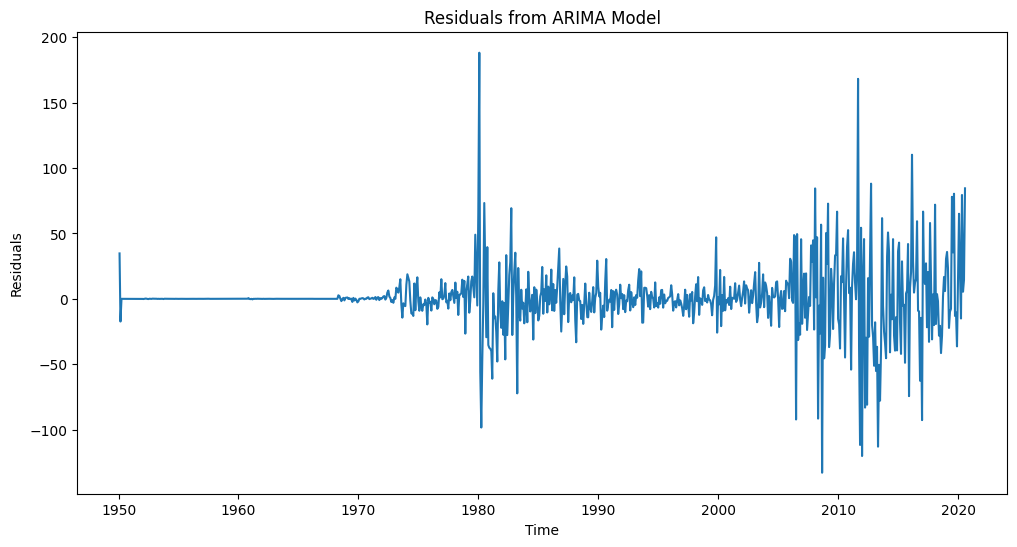

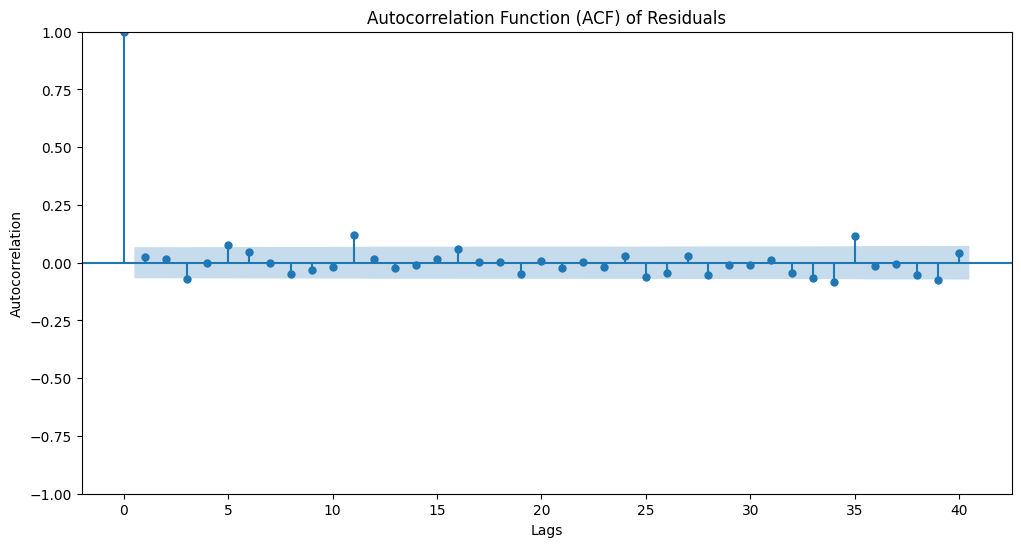

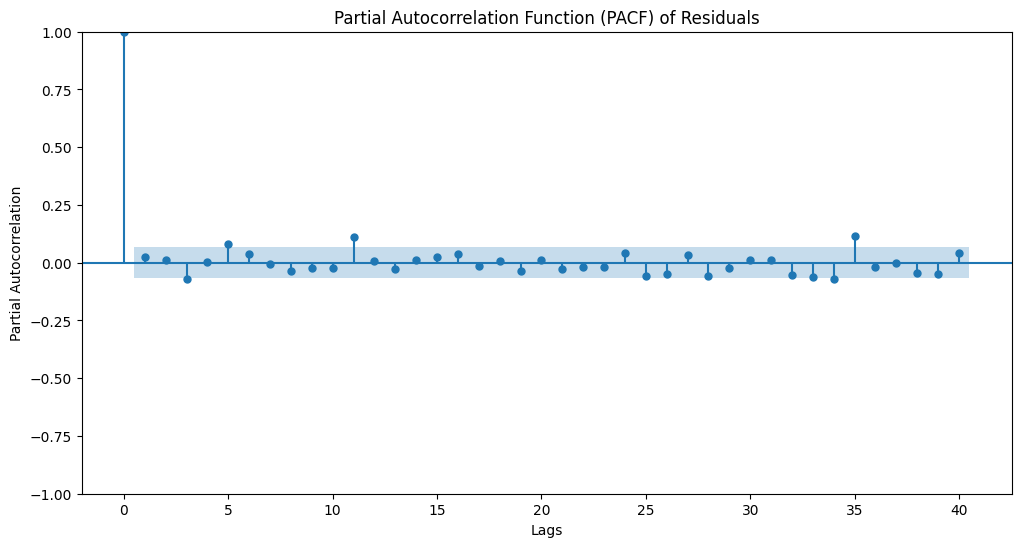

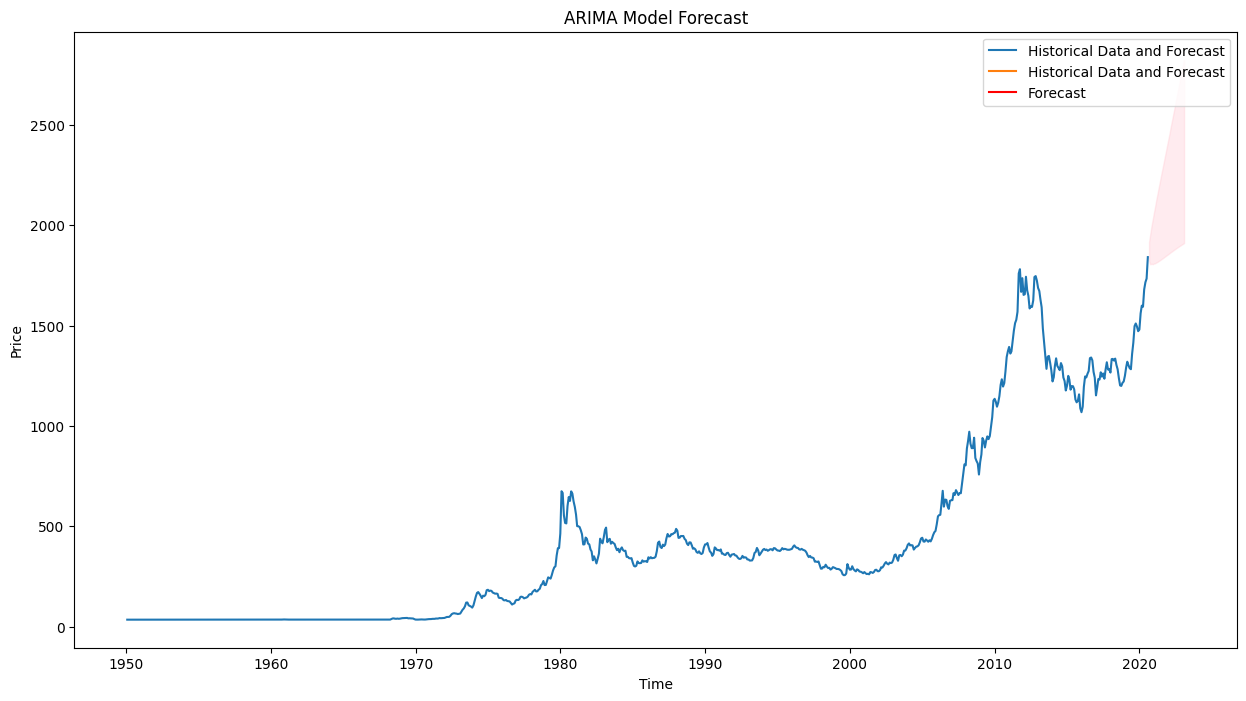

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Assuming your data is stored in a DataFrame called 'df' with a column named 'Price'

# Step 1: Determine the best order for the ARIMA model
auto_model = auto_arima(df['Price'], seasonal=False, trace=True, 
                        error_action='ignore', suppress_warnings=True, stepwise=True)

# Best ARIMA order
order = auto_model.order
print(f"Optimal order for ARIMA model: {order}")

# Step 2: Fit the ARIMA model with the determined order
model = ARIMA(df['Price'], order=order)
model_fit = model.fit()

# Step 3: Extract residuals
residuals = model_fit.resid

# Step 4: Plot residuals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals from ARIMA Model')
plt.show()

# Step 5: Plot ACF of residuals
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

# Step 6: Plot PACF of residuals
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(residuals, lags=40, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.show()

# Step 7: Forecasting
forecast_steps = 30  # Increase the number of steps to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, inclusive='right')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a DataFrame to hold forecasted values
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['Forecast'])

# Combine historical data with forecast
combined_df = pd.concat([df['Price'], forecast_df])

# Plot the forecasted values
plt.figure(figsize=(15, 8))
plt.plot(combined_df, label='Historical Data and Forecast')
plt.plot(forecast_df, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


In [38]:
# Print summary of the fitted model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  847
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -3889.393
Date:                Tue, 14 May 2024   AIC                           7786.785
Time:                        10:55:35   BIC                           7805.743
Sample:                    01-31-1950   HQIC                          7794.049
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6018      0.041    -14.786      0.000      -0.682      -0.522
ma.L1         -0.1598      0.031     -5.173      0.000      -0.220      -0.099
ma.L2         -0.7731      0.028    -27.501      0.0

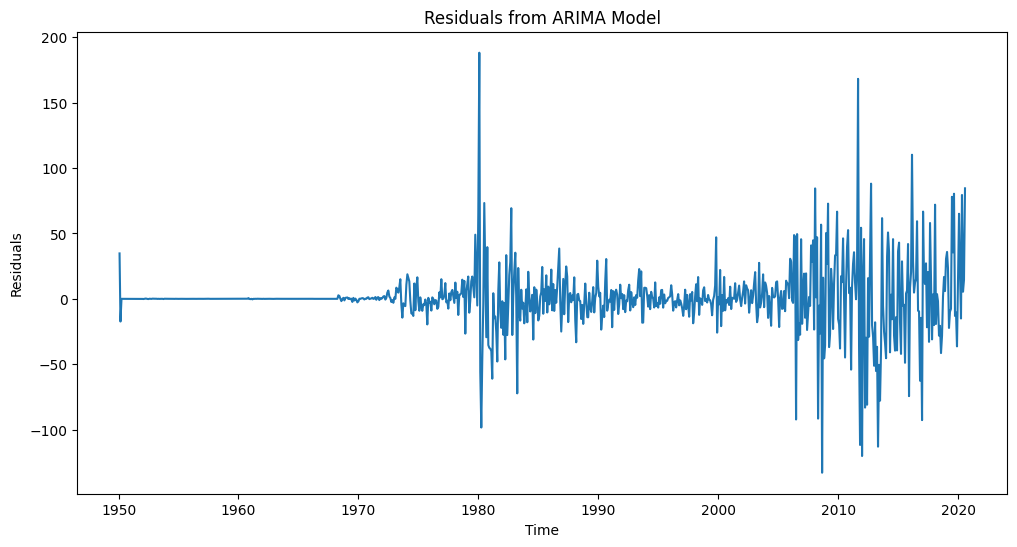

In [39]:
# Step 4: Plot residuals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals from ARIMA Model')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('gold_monthly_csv.csv')

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Splitting into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# ARIMA model
def arima_forecast(train, test):
    history = [x for x in train['Price']]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test['Price'].iloc[t]
        history.append(obs)
    return predictions

# SARIMA model
def sarima_forecast(train, test):
    history = [x for x in train['Price']]
    predictions = []
    for t in range(len(test)):
        model = SARIMAX(history, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test['Price'].iloc[t]
        history.append(obs)
    return predictions

# Evaluate model performance
def evaluate_forecasts(test, predictions):
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

# Visualize the results
def plot_forecasts(test, predictions):
    plt.plot(test, color='blue', label='Actual')
    plt.plot(predictions, color='red', label='Forecast')
    plt.legend()
    plt.show()

# Perform forecasting
arima_preds = arima_forecast(train, test)
sarima_preds = sarima_forecast(train, test)

# Evaluate performance
arima_rmse = evaluate_forecasts(test['Price'], arima_preds)
sarima_rmse = evaluate_forecasts(test['Price'], sarima_preds)
print('ARIMA RMSE:', arima_rmse)
print('SARIMA RMSE:', sarima_rmse)

# Plot the forecasts
plot_forecasts(test['Price'], arima_preds)
plot_forecasts(test['Price'], sarima_preds)
